In [1]:
# data import

import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

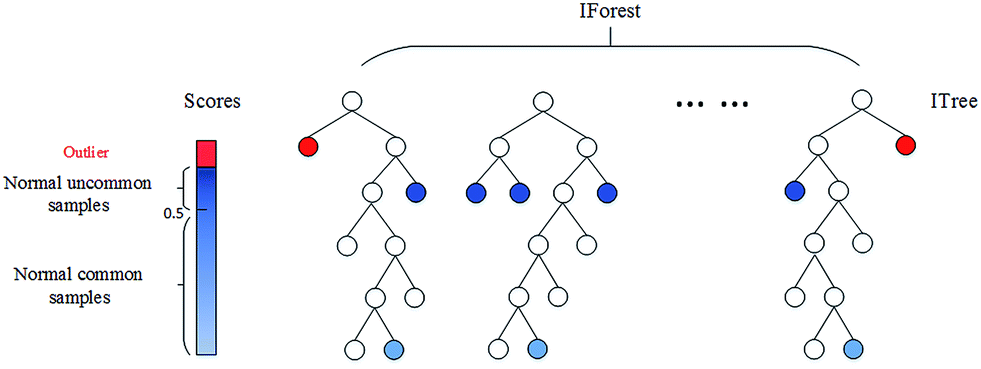

Short Answer
Isolation Forest (iForest) is a machine learning algorithm for anomaly detection. Instances, which have an average shorter path length in the trained isolation forest, are classified as anomalous points.
Long Answer
The isolation Forest algorithm is a very effective and intuitive anomaly detection method, which was first proposed by Fei Tony Liu, Kai Ming Ting, and Zhi-Hua Zhou in 2008. (F. T. Liu, K. M. Ting, and Z.-H. Zhou. Isolation forest. In Proceedings of the IEEE International Conference on Data Mining, pages 413–422, 2008.)

The philosophy behind iForest is that anomalous data points are few and exotic. That makes them isolated from the normal points.

From a mathematical point of view, recursive partitioning can be represented by a tree structure named Isolation Tree, while the number of partitions required to isolate a point can be interpreted as the length of the path, within the tree, to reach a terminating node starting from the root.


Algorithm
Let \boldsymbol{X} = \{x_1, \ldots, x_n\}X={x 
1
​
 ,…,x 
n
​
 } be a set of dd-dimensional points, and \boldsymbol{X}'X 
′
  is a subsample from \boldsymbol{X}X. An Isolation Tree (iTree) is defined as a data structure with the following properties:

For each node \boldsymbol{T}T in the Tree, \boldsymbol{T}T is either an external-node with no child, or an internal-node with one "test" and exactly two daughter nodes (\boldsymbol{T}_ {l}T 
l
​
  and \boldsymbol{T}_ {r}T 
r
​
 ).
A test at node \boldsymbol{T}T consists of an attribute \boldsymbol{q}q and a split value \boldsymbol{p}p such that the test \boldsymbol{q}<\boldsymbol{p}q<p determines the traversal of a data point to either (\boldsymbol{T}_ {l}T 
l
​
  or \boldsymbol{T}_ {r}T 
r
​
 ).
In order to build an iTree, the algorithm recursively divides \boldsymbol{X}'X 
′
  by randomly selecting an attribute \boldsymbol{q}q and a split value \boldsymbol{p}p, until either

In [2]:
# Import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="PHKTKYAZsXz4FtVvo8lUpMJv3",
    project_name="voltajesclase200",
    workspace="napo1998delsur",
)

# Run your code and go to /

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/napo1998delsur/voltajesclase200/0434f0b140d048739fcb89846194ee54



In [3]:
Experiment(log_code=True, api_key="PHKTKYAZsXz4FtVvo8lUpMJv3")

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/napo1998delsur/voltajesclase200/0434f0b140d048739fcb89846194ee54
COMET INFO:   Uploads:
COMET INFO:     environment details : 1
COMET INFO:     filename            : 1
COMET INFO:     git metadata        : 1
COMET INFO:     installed packages  : 1
COMET INFO:     notebook            : 1
COMET INFO:     source_code         : 1
COMET INFO: ---------------------------
COMET WARNING: Not all initial data has been logged for experiment 0434f0b140d048739fcb89846194ee54, call Experiment.end() to ensure that all data to have been logged
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com http

In [4]:
class ExNode:
    def __init__(self,size):
        self.size=size
        
class InNode:
    def __init__(self,left,right,splitAtt,splitVal):
        self.left=left
        self.right=right
        self.splitAtt=splitAtt
        self.splitVal=splitVal

In [5]:
# leer datos
clase200=pd.read_csv(r'C:\Users\nperez\Documents\GitHub\fraudes_grandes_clientes\data\clase200.csv')

In [6]:
clase200.head()

,Id,Etiquetas de fila,ene,feb,mar,abr,may,jun,jul,ago,...,feb.1,mar.1,abr.1,may.1,jun.1,jul.1,ago.1,sep.1,oct.1,nov.1
0,0,200001701,31.0,29.0,31.0,30.0,31.0,31.0,31.0,31.0,...,31.0,30.0,28.0,31.0,31.0,31.0,31.0,30.0,30.0,31.0
1,1,200001801,31.9,29.5,31.3,30.9,31.5,31.3,31.6,31.7,...,31.9,30.0,28.1,31.0,31.1,32.6,31.5,30.4,30.2,31.1
2,2,200003801,31.2,29.0,31.0,30.6,31.7,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,200005801,32.0,29.0,31.0,30.0,31.0,31.0,32.0,31.0,...,31.0,30.0,28.0,31.0,31.0,32.0,31.0,30.0,30.0,31.0
4,4,200005901,32.0,29.0,31.0,30.0,31.0,31.0,32.0,31.0,...,31.0,30.0,28.0,31.0,31.0,32.0,31.0,30.0,30.0,31.0


In [7]:
datos=clase200.fillna(0)

In [8]:
datos.columns

Index(['Id', 'Etiquetas de fila', 'ene', 'feb', 'mar', 'abr', 'may', 'jun',
       'jul', 'ago', 'sep', 'oct', 'nov', 'dic', 'ene.1', 'feb.1', 'mar.1',
       'abr.1', 'may.1', 'jun.1', 'jul.1', 'ago.1', 'sep.1', 'oct.1', 'nov.1'],
      dtype='object')

In [9]:
datos.shape

(116, 25)

In [10]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 116 non-null    int64  
 1   Etiquetas de fila  116 non-null    int64  
 2   ene                116 non-null    float64
 3   feb                116 non-null    float64
 4   mar                116 non-null    float64
 5   abr                116 non-null    float64
 6   may                116 non-null    float64
 7   jun                116 non-null    float64
 8   jul                116 non-null    float64
 9   ago                116 non-null    float64
 10  sep                116 non-null    float64
 11  oct                116 non-null    float64
 12  nov                116 non-null    float64
 13  dic                116 non-null    float64
 14  ene.1              116 non-null    float64
 15  feb.1              116 non-null    float64
 16  mar.1              116 non

array([[<AxesSubplot: title={'center': 'Id'}>,
        <AxesSubplot: title={'center': 'Etiquetas de fila'}>,
        <AxesSubplot: title={'center': 'ene'}>,
        <AxesSubplot: title={'center': 'feb'}>,
        <AxesSubplot: title={'center': 'mar'}>],
       [<AxesSubplot: title={'center': 'abr'}>,
        <AxesSubplot: title={'center': 'may'}>,
        <AxesSubplot: title={'center': 'jun'}>,
        <AxesSubplot: title={'center': 'jul'}>,
        <AxesSubplot: title={'center': 'ago'}>],
       [<AxesSubplot: title={'center': 'sep'}>,
        <AxesSubplot: title={'center': 'oct'}>,
        <AxesSubplot: title={'center': 'nov'}>,
        <AxesSubplot: title={'center': 'dic'}>,
        <AxesSubplot: title={'center': 'ene.1'}>],
       [<AxesSubplot: title={'center': 'feb.1'}>,
        <AxesSubplot: title={'center': 'mar.1'}>,
        <AxesSubplot: title={'center': 'abr.1'}>,
        <AxesSubplot: title={'center': 'may.1'}>,
        <AxesSubplot: title={'center': 'jun.1'}>],
       [<Ax

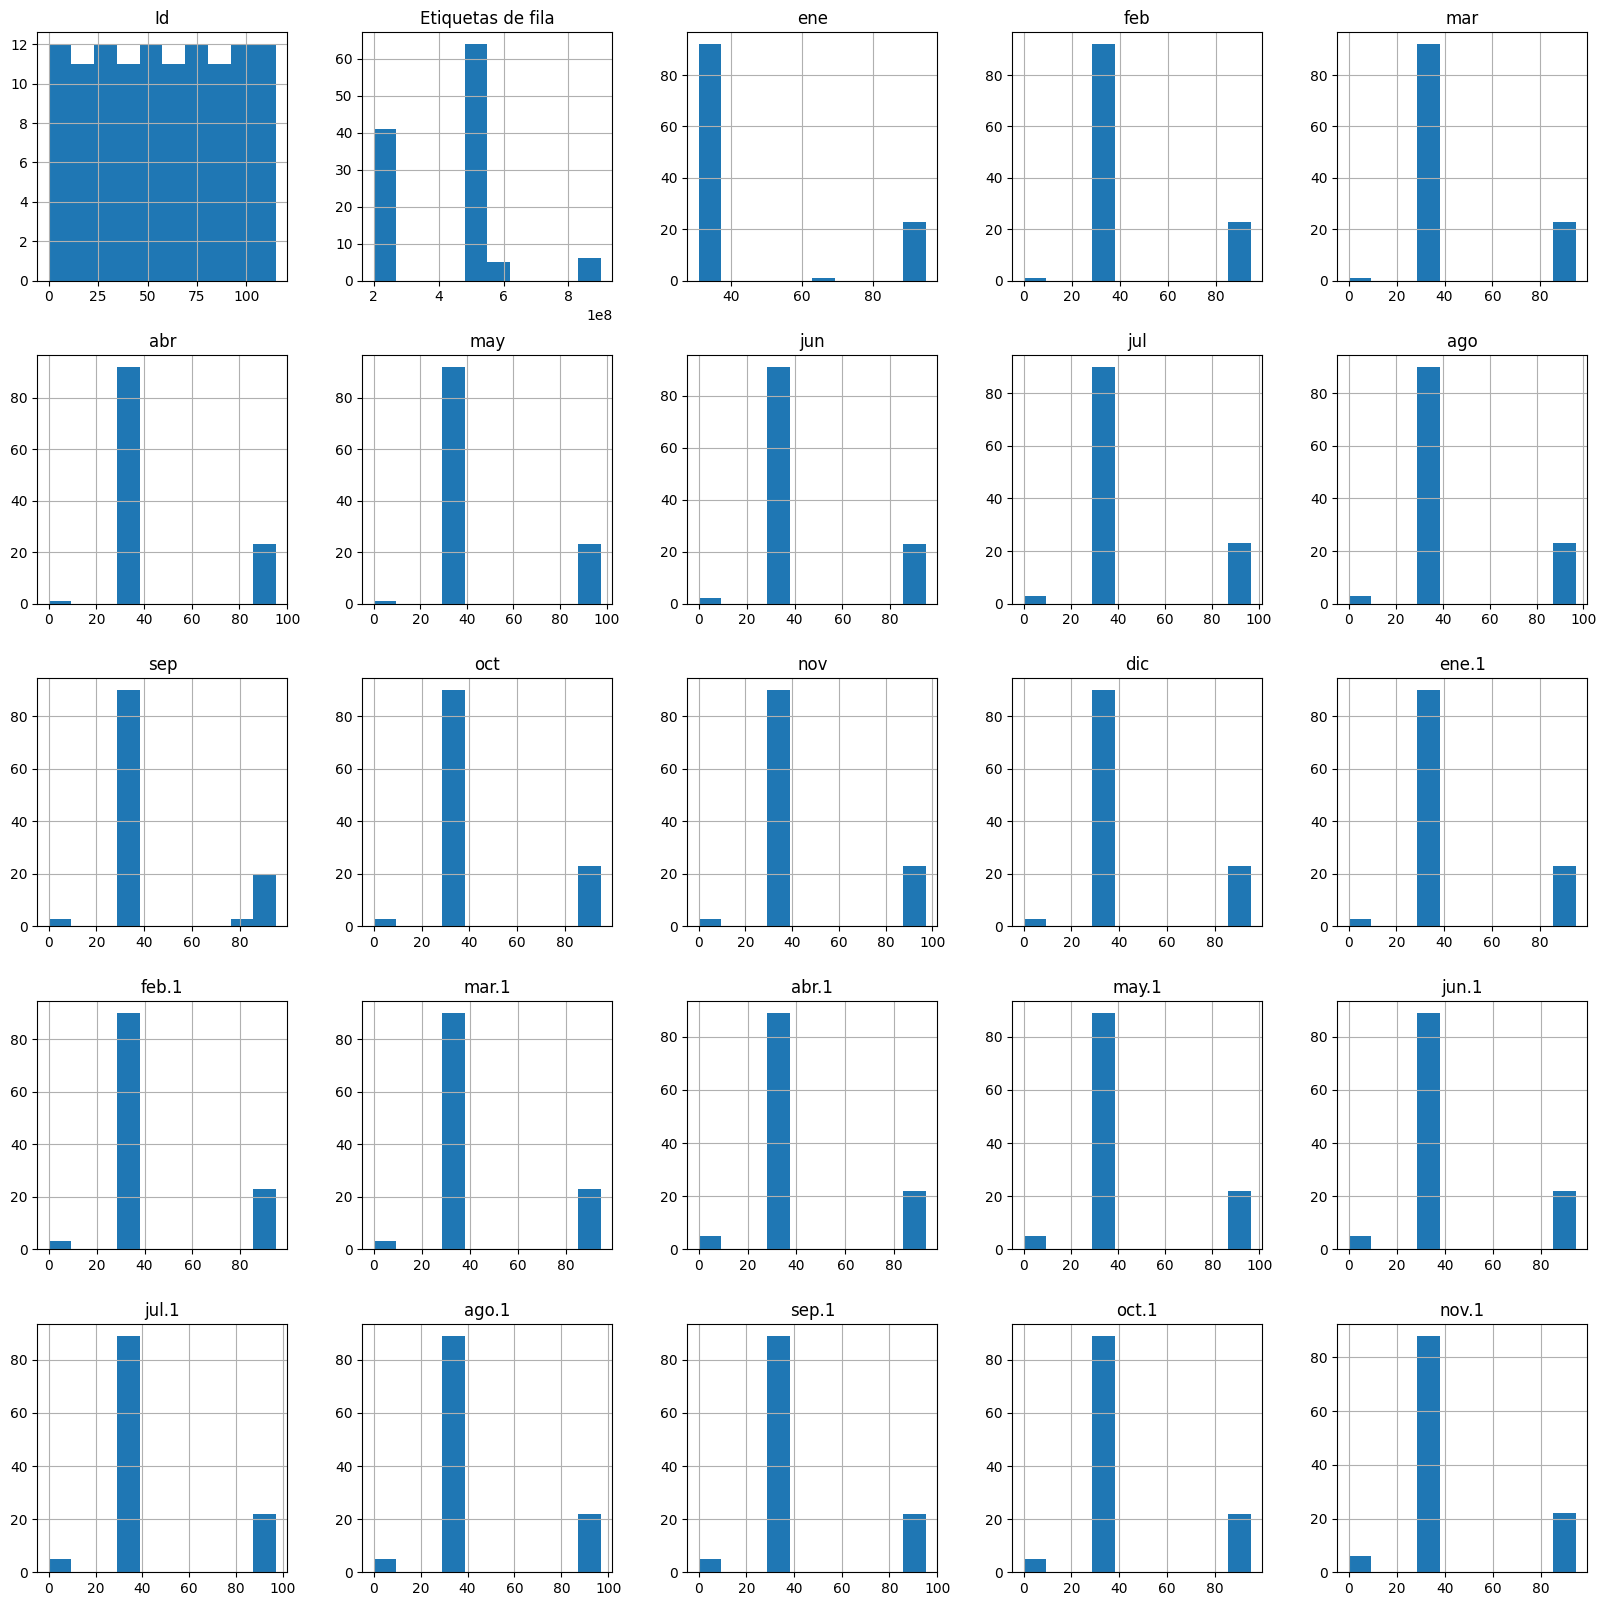

In [11]:
# plot hist

datos.hist(figsize=(20,20))

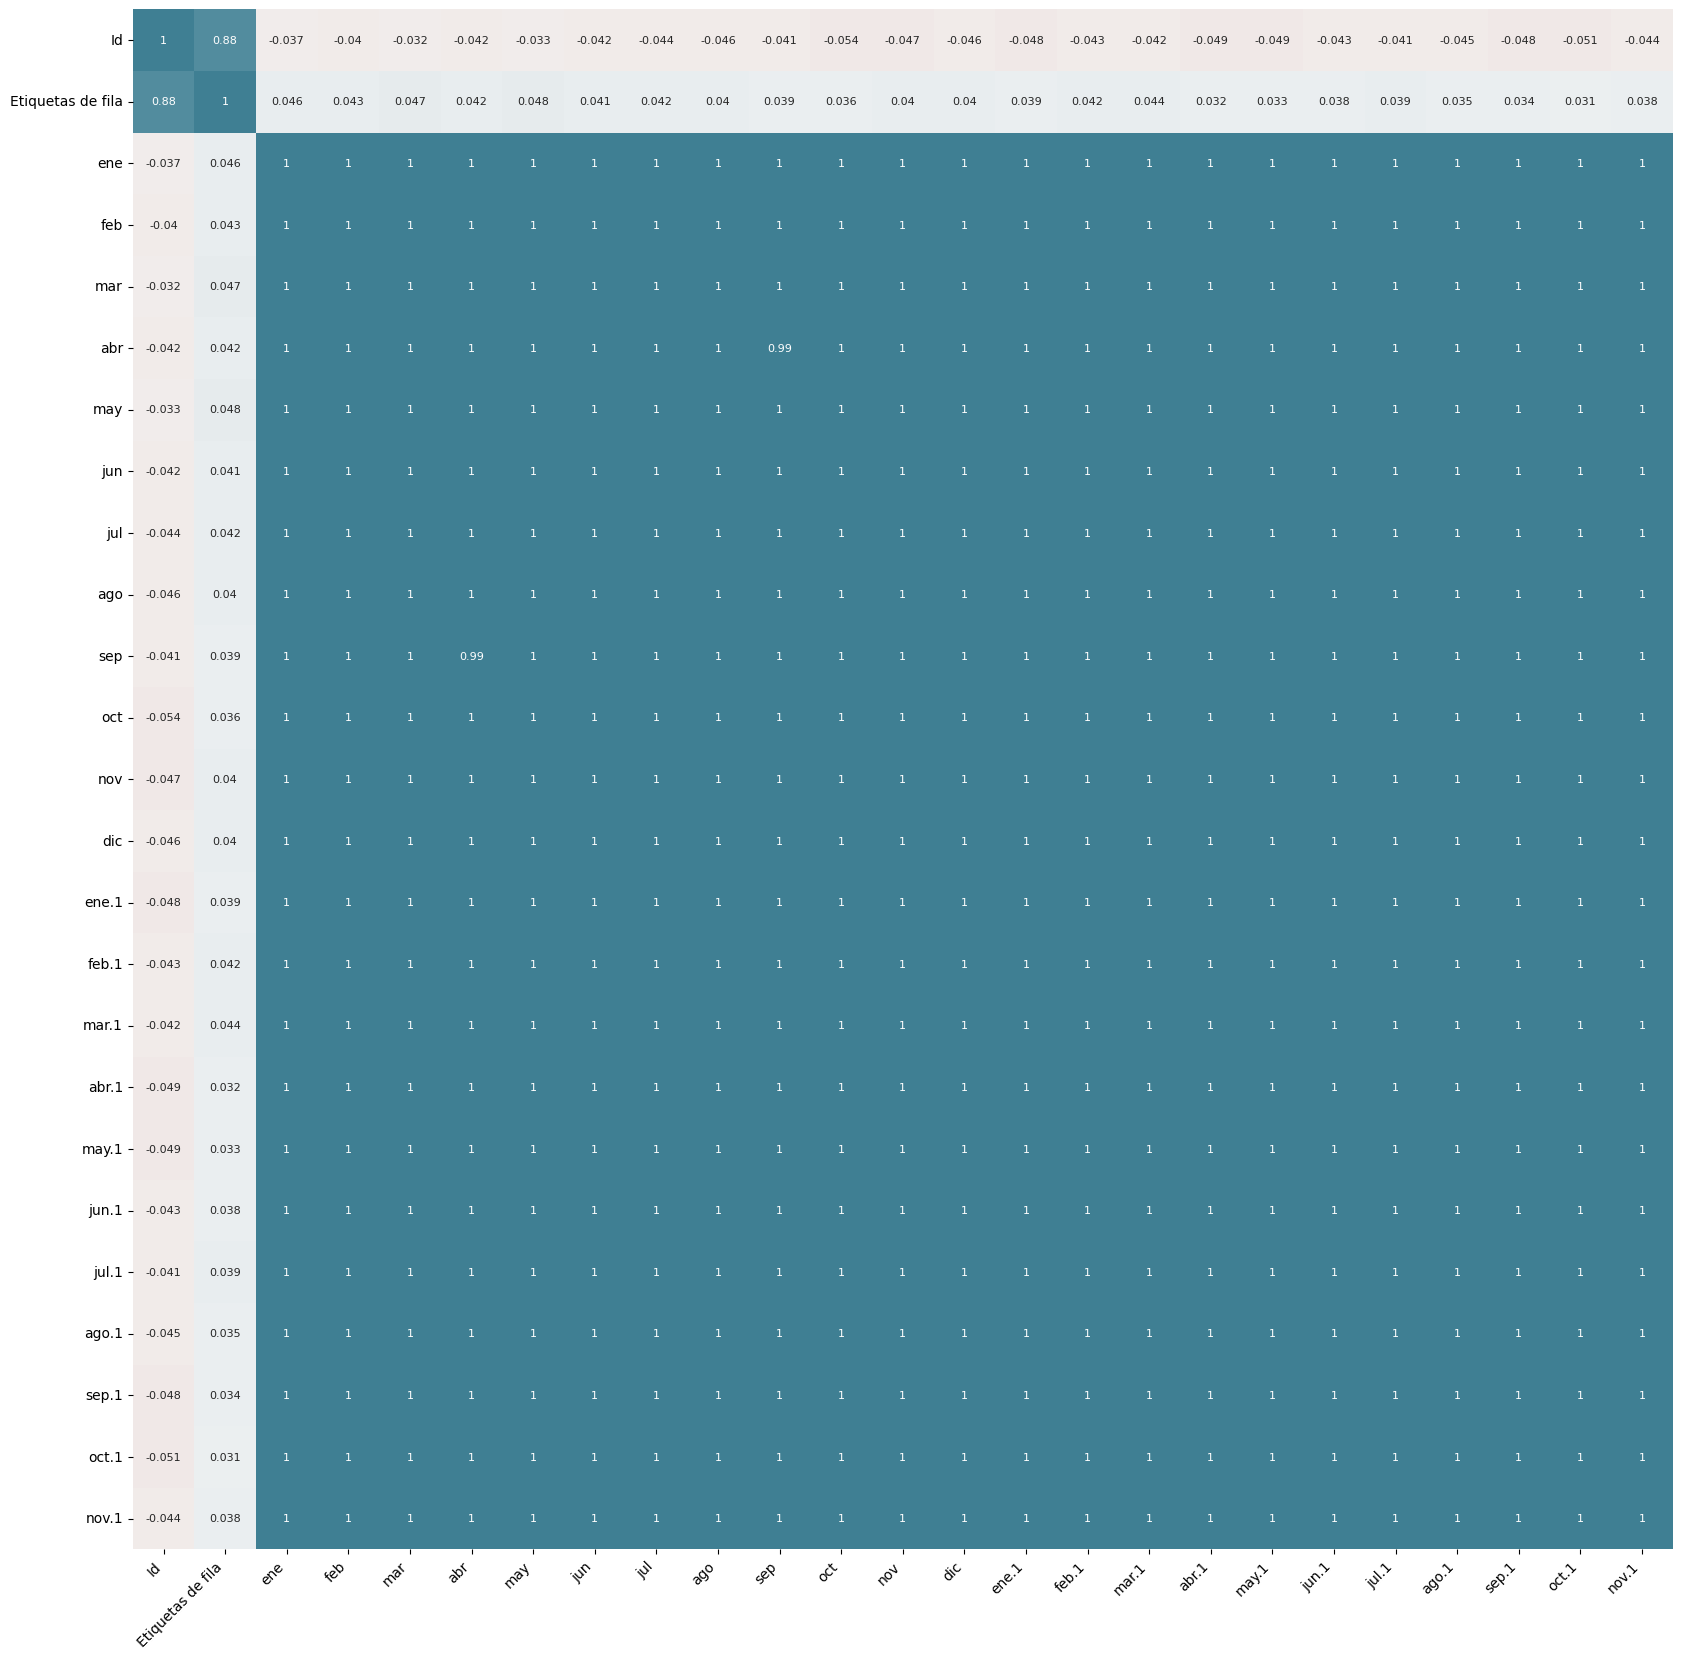

In [12]:
# MATRIZ DE CORRELLACION DE VARIABLES

# encontrar correlAacciones matematicas
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)
corr_matrix =clase200.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(20)

# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,20))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)


In [13]:
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)



corr_matrix = clase200.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(150)

,variable_1,variable_2,r,abs_r
194,jun,jun.1,0.999828,0.999828
482,jun.1,jun,0.999828,0.999828
374,ene.1,nov.1,0.999815,0.999815
614,nov.1,ene.1,0.999815,0.999815
64,ene,ene.1,0.999814,0.999814
...,...,...,...,...
424,mar.1,nov.1,0.999201,0.999201
543,ago.1,may.1,0.999192,0.999192
471,may.1,ago.1,0.999192,0.999192
529,ago.1,mar,0.999190,0.999190


In [14]:
datos.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Id,116.0,5.750000e+01,3.363034e+01,0.0,2.875000e+01,5.750000e+01,8.625000e+01,115.0
Etiquetas de fila,116.0,4.273406e+08,1.841178e+08,200001701.0,2.110580e+08,5.039687e+08,5.136351e+08,900275600.0
ene,116.0,4.408276e+01,2.512163e+01,31.0,3.120000e+01,3.150000e+01,3.190000e+01,94.9
feb,116.0,4.138707e+01,2.505242e+01,0.0,2.910000e+01,2.950000e+01,2.990000e+01,94.5
mar,116.0,4.322414e+01,2.473126e+01,0.0,3.120000e+01,3.160000e+01,3.190000e+01,94.9
abr,116.0,4.224914e+01,2.482048e+01,0.0,3.017500e+01,3.050000e+01,3.080000e+01,95.3
may,116.0,4.339655e+01,2.520156e+01,0.0,3.110000e+01,3.140000e+01,3.190000e+01,97.6
jun,116.0,4.300776e+01,2.519227e+01,0.0,3.110000e+01,3.150000e+01,3.190000e+01,94.9
jul,116.0,4.331121e+01,2.562793e+01,0.0,3.170000e+01,3.200000e+01,3.270000e+01,96.6
ago,116.0,4.309569e+01,2.624842e+01,0.0,3.100000e+01,3.150000e+01,3.190000e+01,96.8


In [15]:
from sklearn.ensemble import IsolationForest

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X=datos[[ 'ene', 'feb', 'mar', 'abr', 'may', 'jun', 'jul',
       'ago', 'sep', 'oct', 'nov', 'dic', 'ene.1', 'feb.1', 'mar.1', 'abr.1',
       'may.1', 'jun.1', 'jul.1', 'ago.1', 'sep.1', 'oct.1', 'nov.1']]

In [18]:

X_train, X_test =\
       train_test_split(X, 
                        test_size=0.2, 
                        random_state=1,
                        )

In [19]:
clf = IsolationForest(random_state=0).fit(X_train)

In [20]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix,f1_score

In [21]:
import time
import warnings
from sklearn.ensemble import IsolationForest
from sklearn.metrics import make_scorer, f1_score
from sklearn import model_selection


H(i)=ln(i)+γ


In [22]:
clf.predict(X_test)

array([-1,  1,  1, -1, -1,  1,  1,  1,  1,  1, -1, -1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1])

In [23]:
from sklearn.metrics import accuracy_score

y_pred=clf.predict(X_test)
y_true=clf.predict(X_test)
accuracy_score(y_true, y_pred)

1.0

In [24]:
accuracy_score(y_true, y_pred)

1.0

clf.predict(X)

output=clf.predict(X)

In [25]:
output=clf.predict(X)

In [26]:
pred_df = pd.DataFrame(output,columns=["Predicción"])
pred_df.to_csv('outputcla.csv', header=True, index_label='Id')

In [27]:
pred_df.head()

,Predicción
0,1
1,1
2,-1
3,1
4,1


In [28]:
clase200.head()

,Id,Etiquetas de fila,ene,feb,mar,abr,may,jun,jul,ago,...,feb.1,mar.1,abr.1,may.1,jun.1,jul.1,ago.1,sep.1,oct.1,nov.1
0,0,200001701,31.0,29.0,31.0,30.0,31.0,31.0,31.0,31.0,...,31.0,30.0,28.0,31.0,31.0,31.0,31.0,30.0,30.0,31.0
1,1,200001801,31.9,29.5,31.3,30.9,31.5,31.3,31.6,31.7,...,31.9,30.0,28.1,31.0,31.1,32.6,31.5,30.4,30.2,31.1
2,2,200003801,31.2,29.0,31.0,30.6,31.7,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,200005801,32.0,29.0,31.0,30.0,31.0,31.0,32.0,31.0,...,31.0,30.0,28.0,31.0,31.0,32.0,31.0,30.0,30.0,31.0
4,4,200005901,32.0,29.0,31.0,30.0,31.0,31.0,32.0,31.0,...,31.0,30.0,28.0,31.0,31.0,32.0,31.0,30.0,30.0,31.0


In [29]:
output=pd.read_csv(r'C:\Users\nperez\Documents\GitHub\fraudes_grandes_clientes\eda\outputcla.csv')

In [30]:
output.head()

,Id,Predicción
0,0,1
1,1,1
2,2,-1
3,3,1
4,4,1


In [31]:
pred_df.columns

Index(['Predicción'], dtype='object')

In [32]:
join=pd.merge(clase200,output, how='inner', on='Id')

In [33]:
join.head()

,Id,Etiquetas de fila,ene,feb,mar,abr,may,jun,jul,ago,...,mar.1,abr.1,may.1,jun.1,jul.1,ago.1,sep.1,oct.1,nov.1,Predicción
0,0,200001701,31.0,29.0,31.0,30.0,31.0,31.0,31.0,31.0,...,30.0,28.0,31.0,31.0,31.0,31.0,30.0,30.0,31.0,1
1,1,200001801,31.9,29.5,31.3,30.9,31.5,31.3,31.6,31.7,...,30.0,28.1,31.0,31.1,32.6,31.5,30.4,30.2,31.1,1
2,2,200003801,31.2,29.0,31.0,30.6,31.7,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
3,3,200005801,32.0,29.0,31.0,30.0,31.0,31.0,32.0,31.0,...,30.0,28.0,31.0,31.0,32.0,31.0,30.0,30.0,31.0,1
4,4,200005901,32.0,29.0,31.0,30.0,31.0,31.0,32.0,31.0,...,30.0,28.0,31.0,31.0,32.0,31.0,30.0,30.0,31.0,1


In [34]:
prediccion={
    1:'Sin Anomalia',
    -1:'Anomalia'
}
join['Predicción_map']=join['Predicción'].map(prediccion)

In [35]:
# reporte final

final=join.to_excel('Reporteclase200_final01.xlsx')

PermissionError: [Errno 13] Permission denied: 'Reporteclase200_final01.xlsx'

In [ ]:
datos=pd.read_excel(r'C:\Users\nperez\Documents\GitHub\fraudes_grandes_clientes\eda\Reporteclase200_final01.xlsx')

In [ ]:
import plotly.express as px

px.scatter(datos,x='Contrato', y='Predicción', color='Predicción_map')